# Splines

In [1]:
from IPython import get_ipython
if get_ipython():
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la
la.logger.setLevel("INFO")

## Random walks

In [2]:
cells = la.Dim(pd.Series(range(100), name = "cell").astype(str))
genes = la.Dim(pd.Series(range(4), name = "gene").astype(str))

In [3]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [4]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000, -1.3560, -0.7755,  1.4465,  1.5007,  2.7051,  1.4600,  2.5929,
         2.5232,  1.7008])
tensor([-14.3113])


In [5]:
knots = la.Dim(range(10), "knot")

In [6]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([genes, knots]))

In [7]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000, -0.9855, -1.2612, -0.5008, -1.5223, -3.4522, -4.3150, -4.2395,
         -4.3947, -4.9798],
        [ 0.0000, -0.3476,  1.3372,  2.2613,  1.5057,  1.5301, -0.1969,  0.9057,
          1.9626,  0.9954],
        [ 0.0000,  0.0721,  0.3811,  0.6997, -0.1891, -1.5020, -3.0243, -3.6671,
         -4.4263, -4.5070],
        [ 0.0000, -0.4873, -0.0997, -1.0042, -1.3860, -0.9234, -1.1209, -2.1820,
         -1.6480,  0.0693]])
tensor([[-12.0254],
        [-13.5884],
        [-11.2852],
        [-11.2528]])


In [8]:
knots = la.Dim(range(10), "knot")

In [9]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([knots, genes]))

In [10]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.8025,  1.2215, -0.0745,  1.1649],
        [ 0.6293,  1.6182,  0.3881,  2.6126],
        [-0.0816,  2.4838,  1.5864,  1.7807],
        [-2.8664,  2.8879,  0.1812,  2.4459],
        [-2.3511,  3.8330,  0.0561,  1.3708],
        [-2.6435,  4.3337,  0.8028,  0.6824],
        [-1.4908,  4.4131, -0.2734,  0.7396],
        [-0.5389,  4.8945,  0.8538,  0.9352],
        [-1.4635,  6.2838,  0.8697,  1.7097]])
tensor([[-1.2410, -1.6650, -0.9217, -1.5974],
        [-0.9339, -0.9976, -1.0259, -1.9668],
        [-1.1716, -1.2936, -1.6369, -1.2650],
        [-4.7965, -1.0006, -1.9063, -1.1402],
        [-1.0517, -1.3656, -0.9268, -1.4968],
        [-0.9617, -1.0443, -1.1977, -1.1559],
        [-1.5833, -0.9221, -1.4980, -0.9206],
        [-1.3720, -1.0348, -1.5542, -0.9381],
        [-1.3464, -1.8841, -0.9191, -1.2189]])
tensor([[-14.4581, -11.2076, -11.5866, -11.6997]])
tensor([[-14.4581, -11.2076, -11.5866, -11.6997]])
tensor([[-8.2704, -8.2


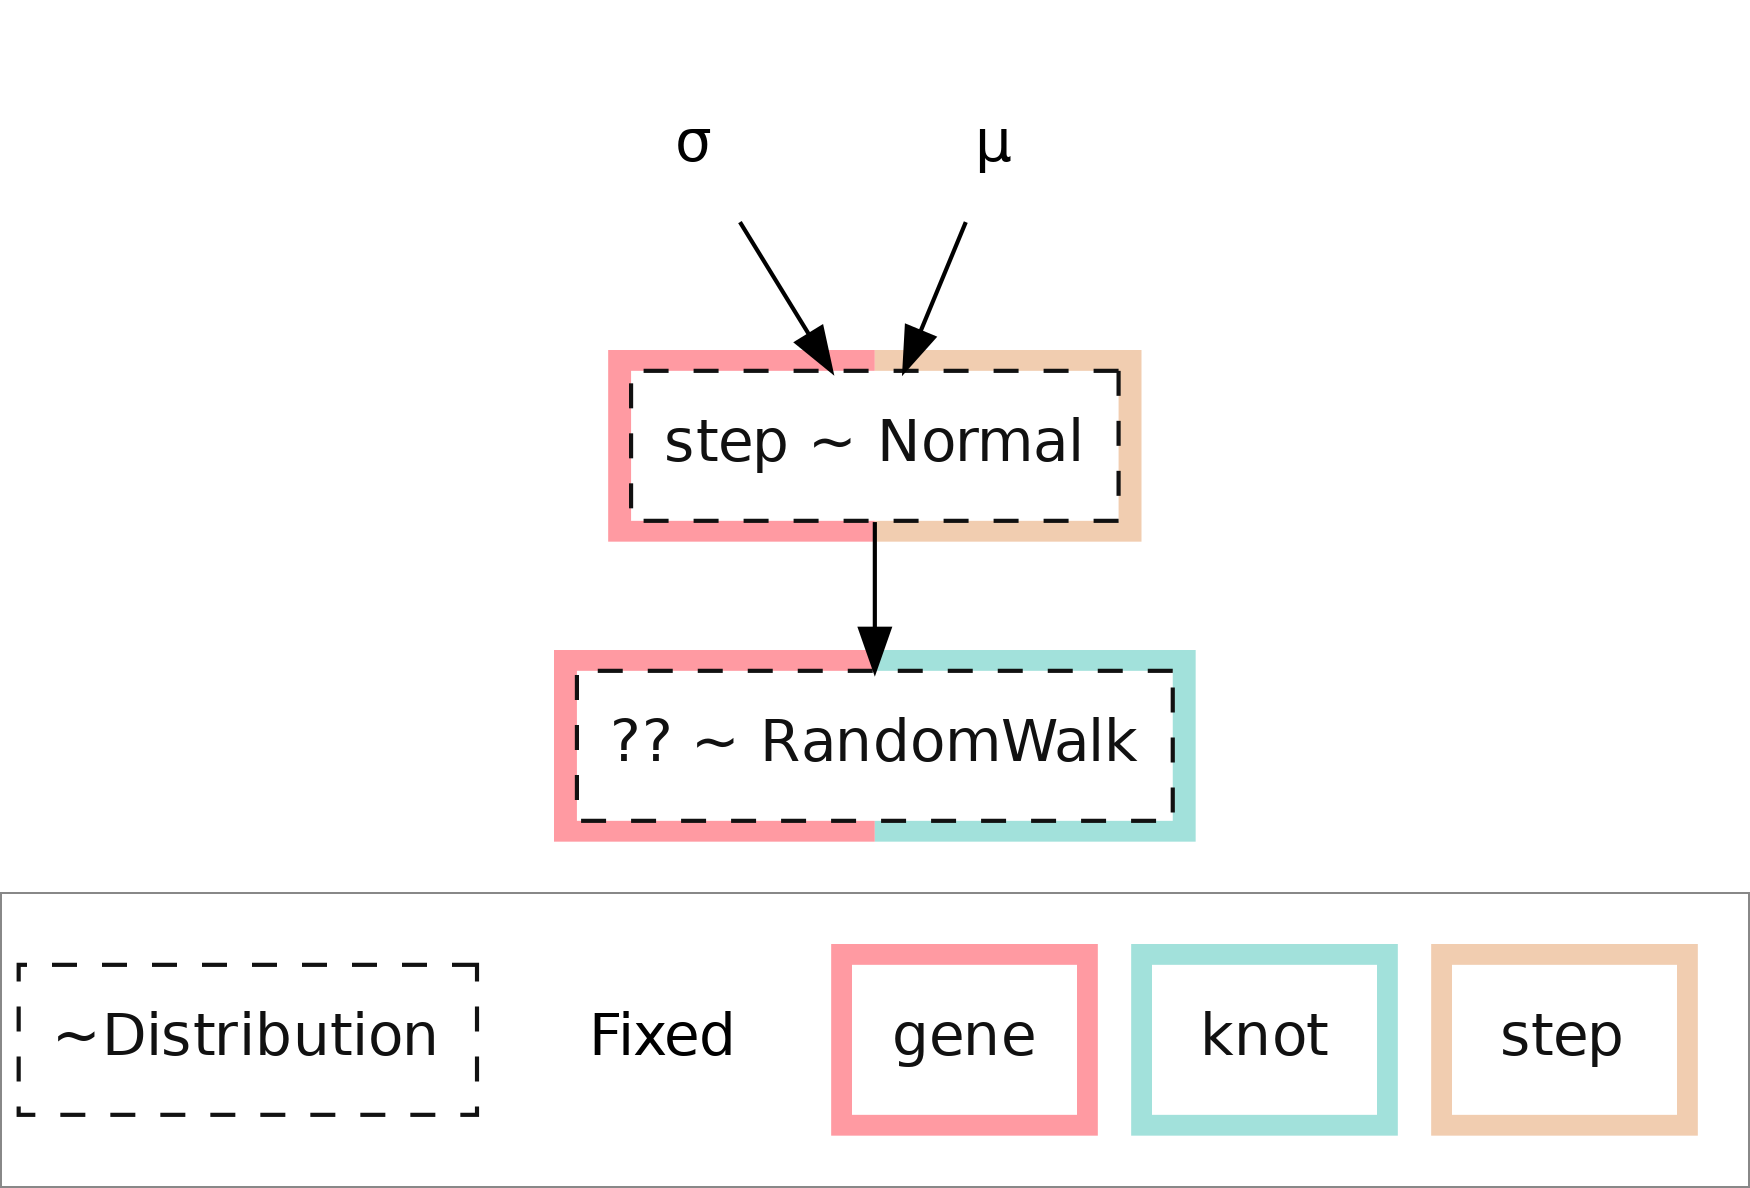

In [11]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(definition = la.Definition([genes])))
dist.plot()

In [12]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.9489, -0.1856, -0.6143, -0.5467,  0.2321,  0.0473,  0.2263,
          0.8176, -1.5391],
        [ 0.0000,  0.8221,  0.5360,  1.2450,  1.2781,  2.5539,  2.0672,  1.7810,
          2.9251,  3.3790],
        [ 0.0000, -1.0678, -2.8807, -3.5924, -2.9256, -2.6432, -3.9734, -3.2040,
         -3.1670, -3.5104],
        [ 0.0000, -0.5096,  0.5573, -0.2928, -1.3840, -0.3078, -0.3533, -0.1210,
          0.9510,  0.8246]])
tensor([[-1.3691, -1.5624, -1.0109, -0.9212, -1.2221, -0.9360, -0.9350, -1.0938,
         -3.6961],
        [-1.2568, -0.9599, -1.1703, -0.9195, -1.7327, -1.0374, -0.9599, -1.5735,
         -1.0220],
        [-1.4891, -2.5622, -1.1722, -1.1412, -0.9588, -1.8037, -1.2149, -0.9196,
         -0.9779],
        [-1.0488, -1.4880, -1.2803, -1.5142, -1.4981, -0.9200, -0.9459, -1.4935,
         -0.9269]])
tensor([[-12.7466],
        [-10.6319],
        [-12.2397],
        [-11.1157]])
tensor([[-12.7466],
        [-10.6319],
        [-12.2397],
        [-11.1157]])


In [13]:
genes = la.Dim(pd.Series(range(100), name = "gene").astype(str))

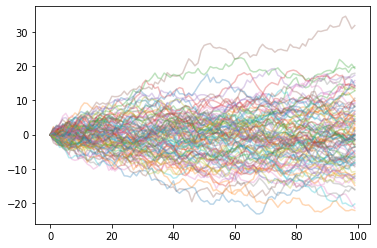

In [14]:
dist = la.distributions.RandomWalk(100, la.distributions.Normal(definition = la.Definition([genes])))
dist.run()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x = np.arange(value.shape[1]), y = value[i], alpha = 0.3)

## Generative model

In [15]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name = "cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 3, n_cells), index = cells.index), label = "x")

In [16]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], id = "gene")
knots = la.Dim(range(n_knots), id = "knot")

steps = np.random.choice([-1, 1], (n_genes, n_knots)) * np.random.normal(3., 1., (n_genes, n_knots)) * (np.random.random((n_genes, n_knots)) > 0.5)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims = True)
a = la.Fixed(
    pd.DataFrame(
        a_value,
        columns = knots.index, index = genes.index),
    label = "a"
)
intercept = la.Fixed(pd.Series(np.random.choice([-1, 1], n_genes) * np.random.normal(3., 1., n_genes) * (np.random.random(n_genes) > 0.5), index = genes.index), label = "intercept")
scale = la.Fixed(pd.Series(np.random.uniform(1., 1.2, n_genes), index = genes.index), label = "scale")

In [17]:
y = la.links.scalar.Spline(x = x, a = a, b = intercept)
dist = la.distributions.Normal(loc = y, scale = scale)


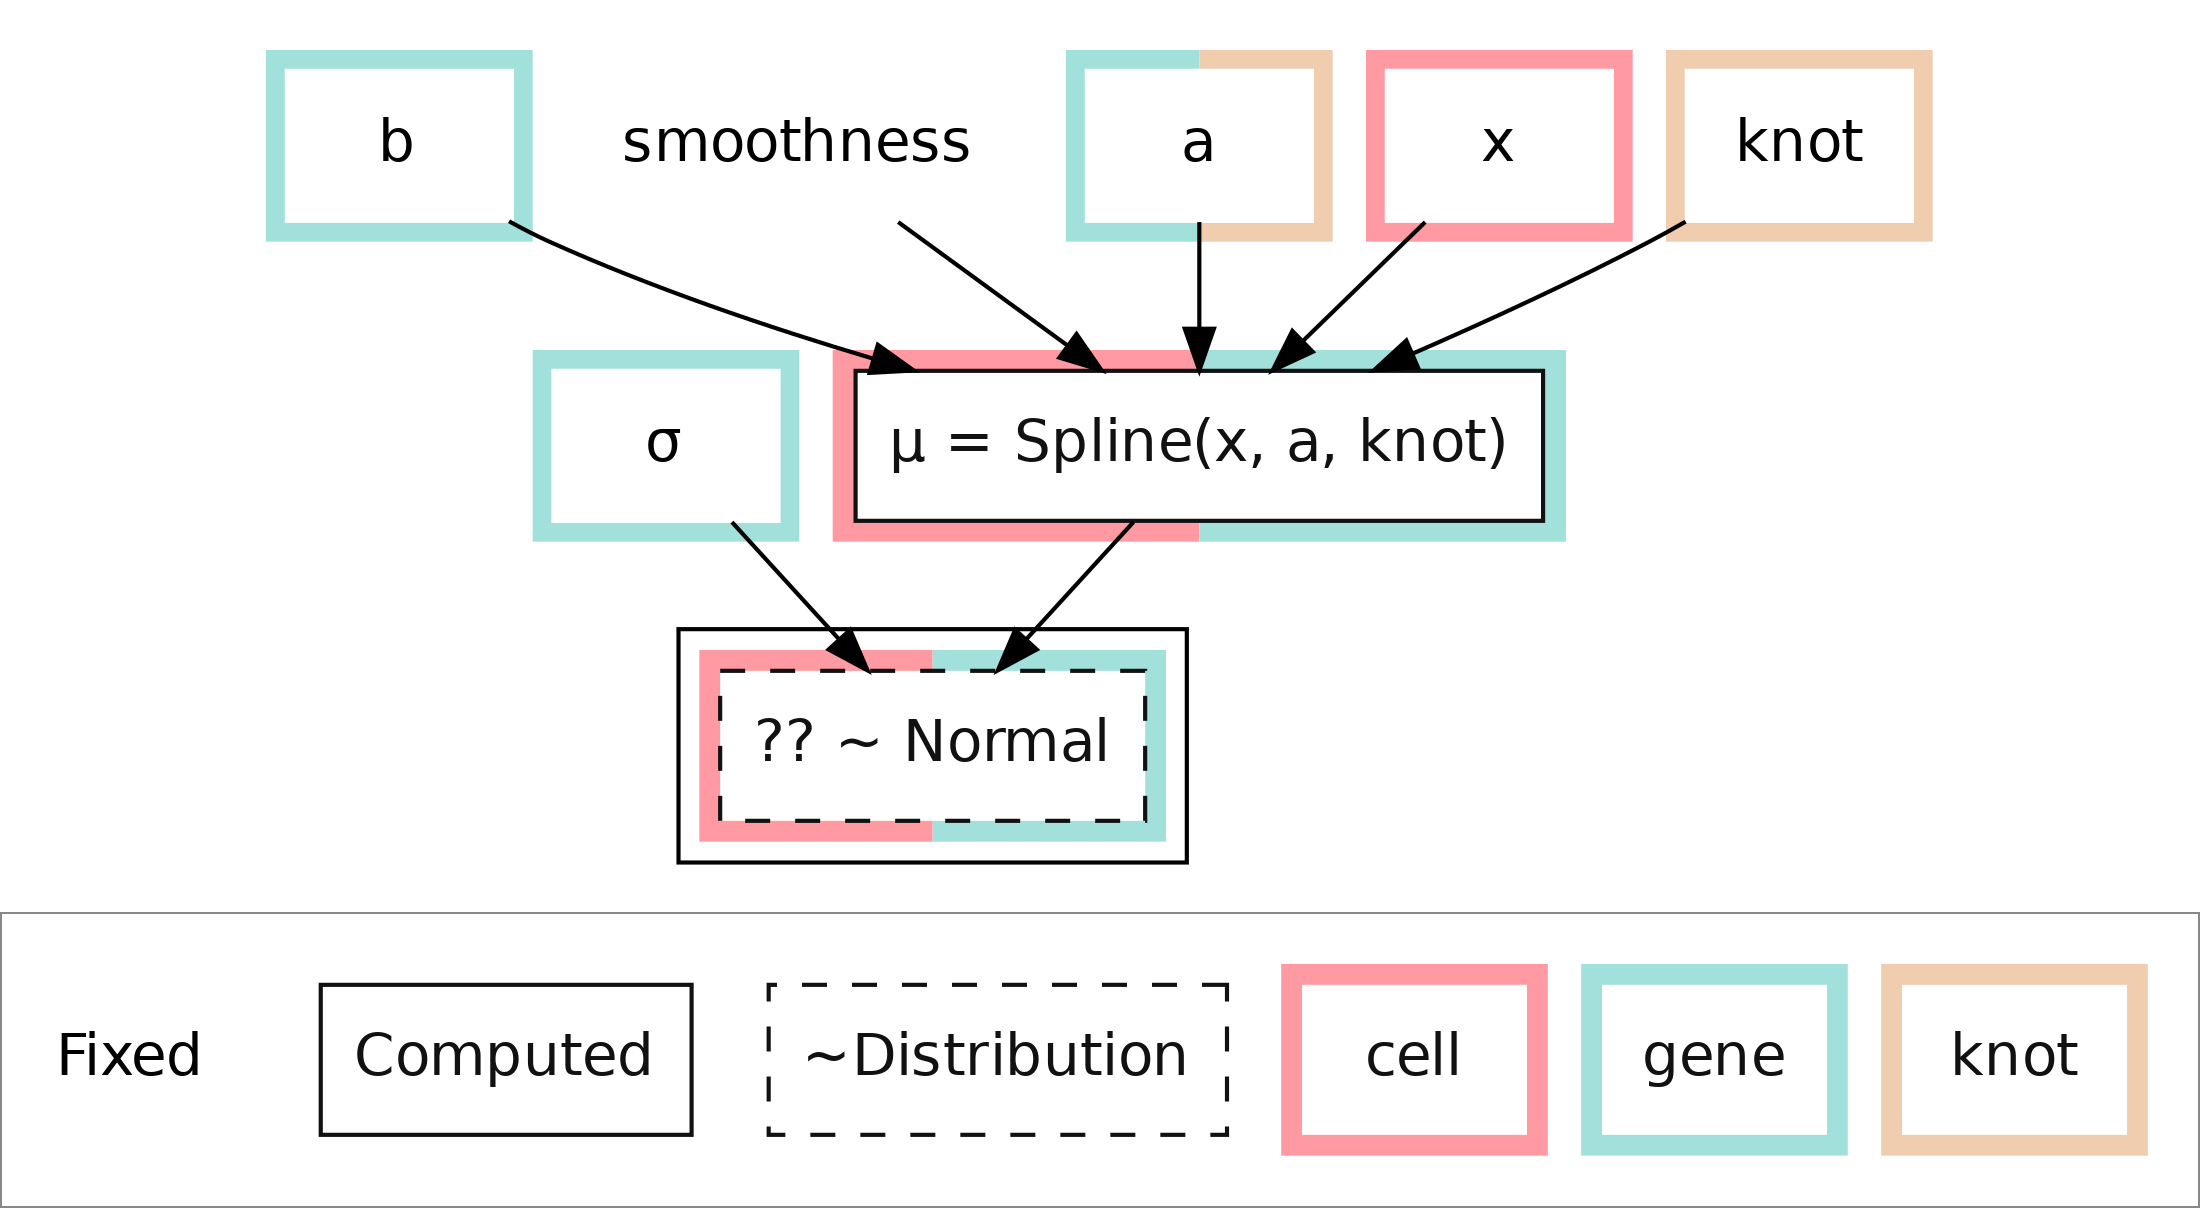

In [18]:
model_gs = la.Model(dist, label = "ground truth", symbol = "gs")
model_gs.plot()

In [19]:
posterior = la.posterior.Posterior(dist)
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

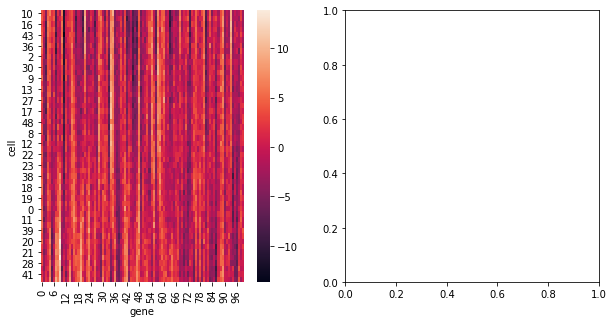

In [20]:
loc_value = posterior.samples[dist.loc].sel(sample = 0).to_pandas()
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)

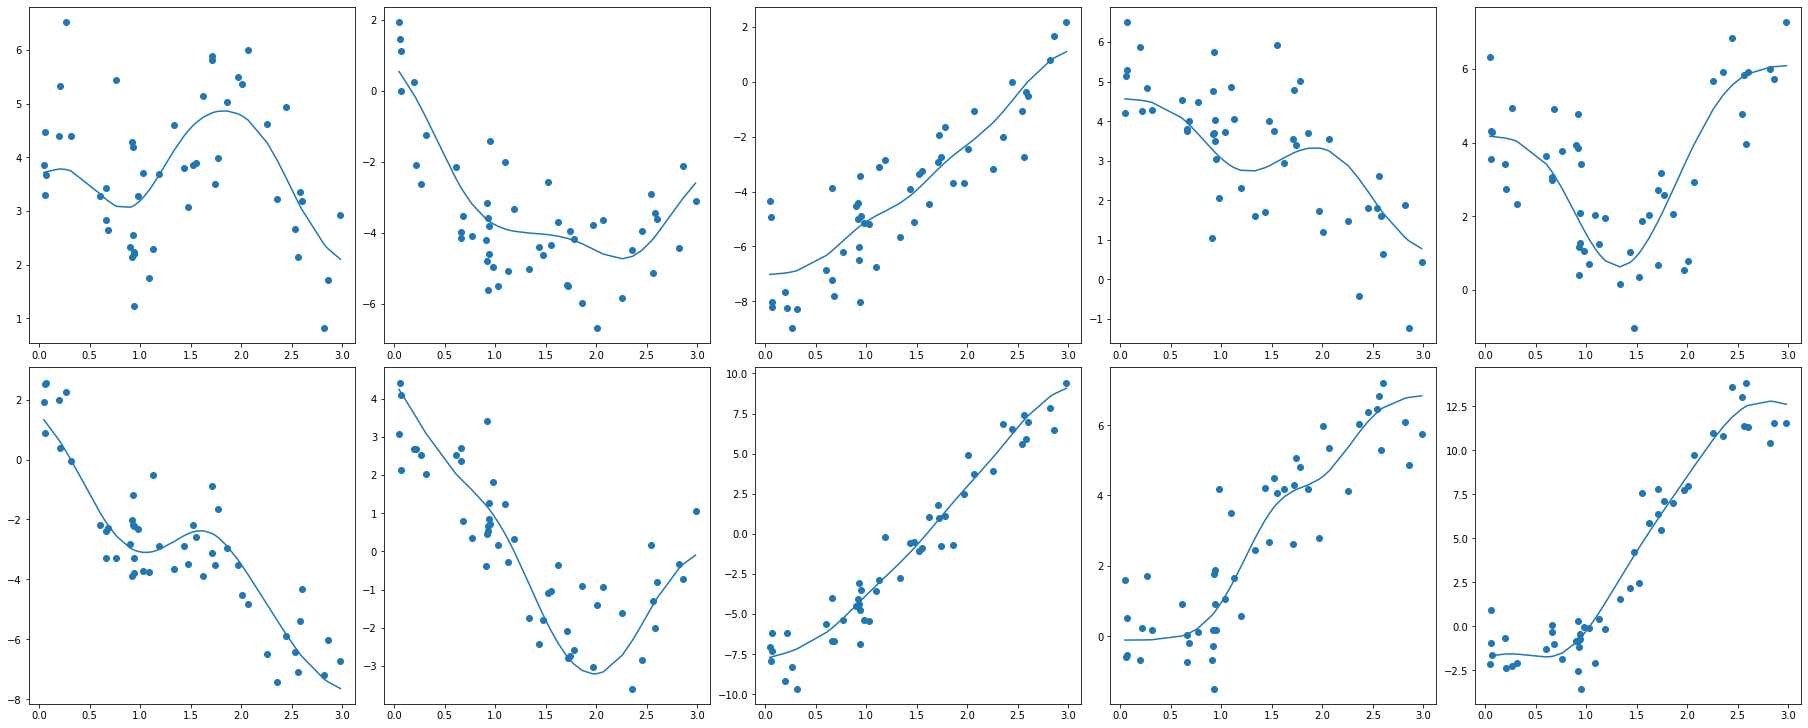

In [21]:
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find("x").prior_pd().sort_values().index
x_value = model_gs.find("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(
        x_value.loc[cell_order],
        observation_value.loc[cell_order, gene_id]
    )
    ax.plot(
        x_value.loc[cell_order],
        loc_value.loc[cell_order, gene_id]
    )
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [22]:
s = la.Parameter(1., definition = scale, transforms = la.distributions.Exponential().biject_to())

z = la.links.scalar.Spline(x, knot = model_gs.find("knot"), b = intercept, output = y.value_definition)

dist = la.distributions.Normal(loc = z, scale = s)

observation = la.Observation(observation_value, dist, label = "observation")


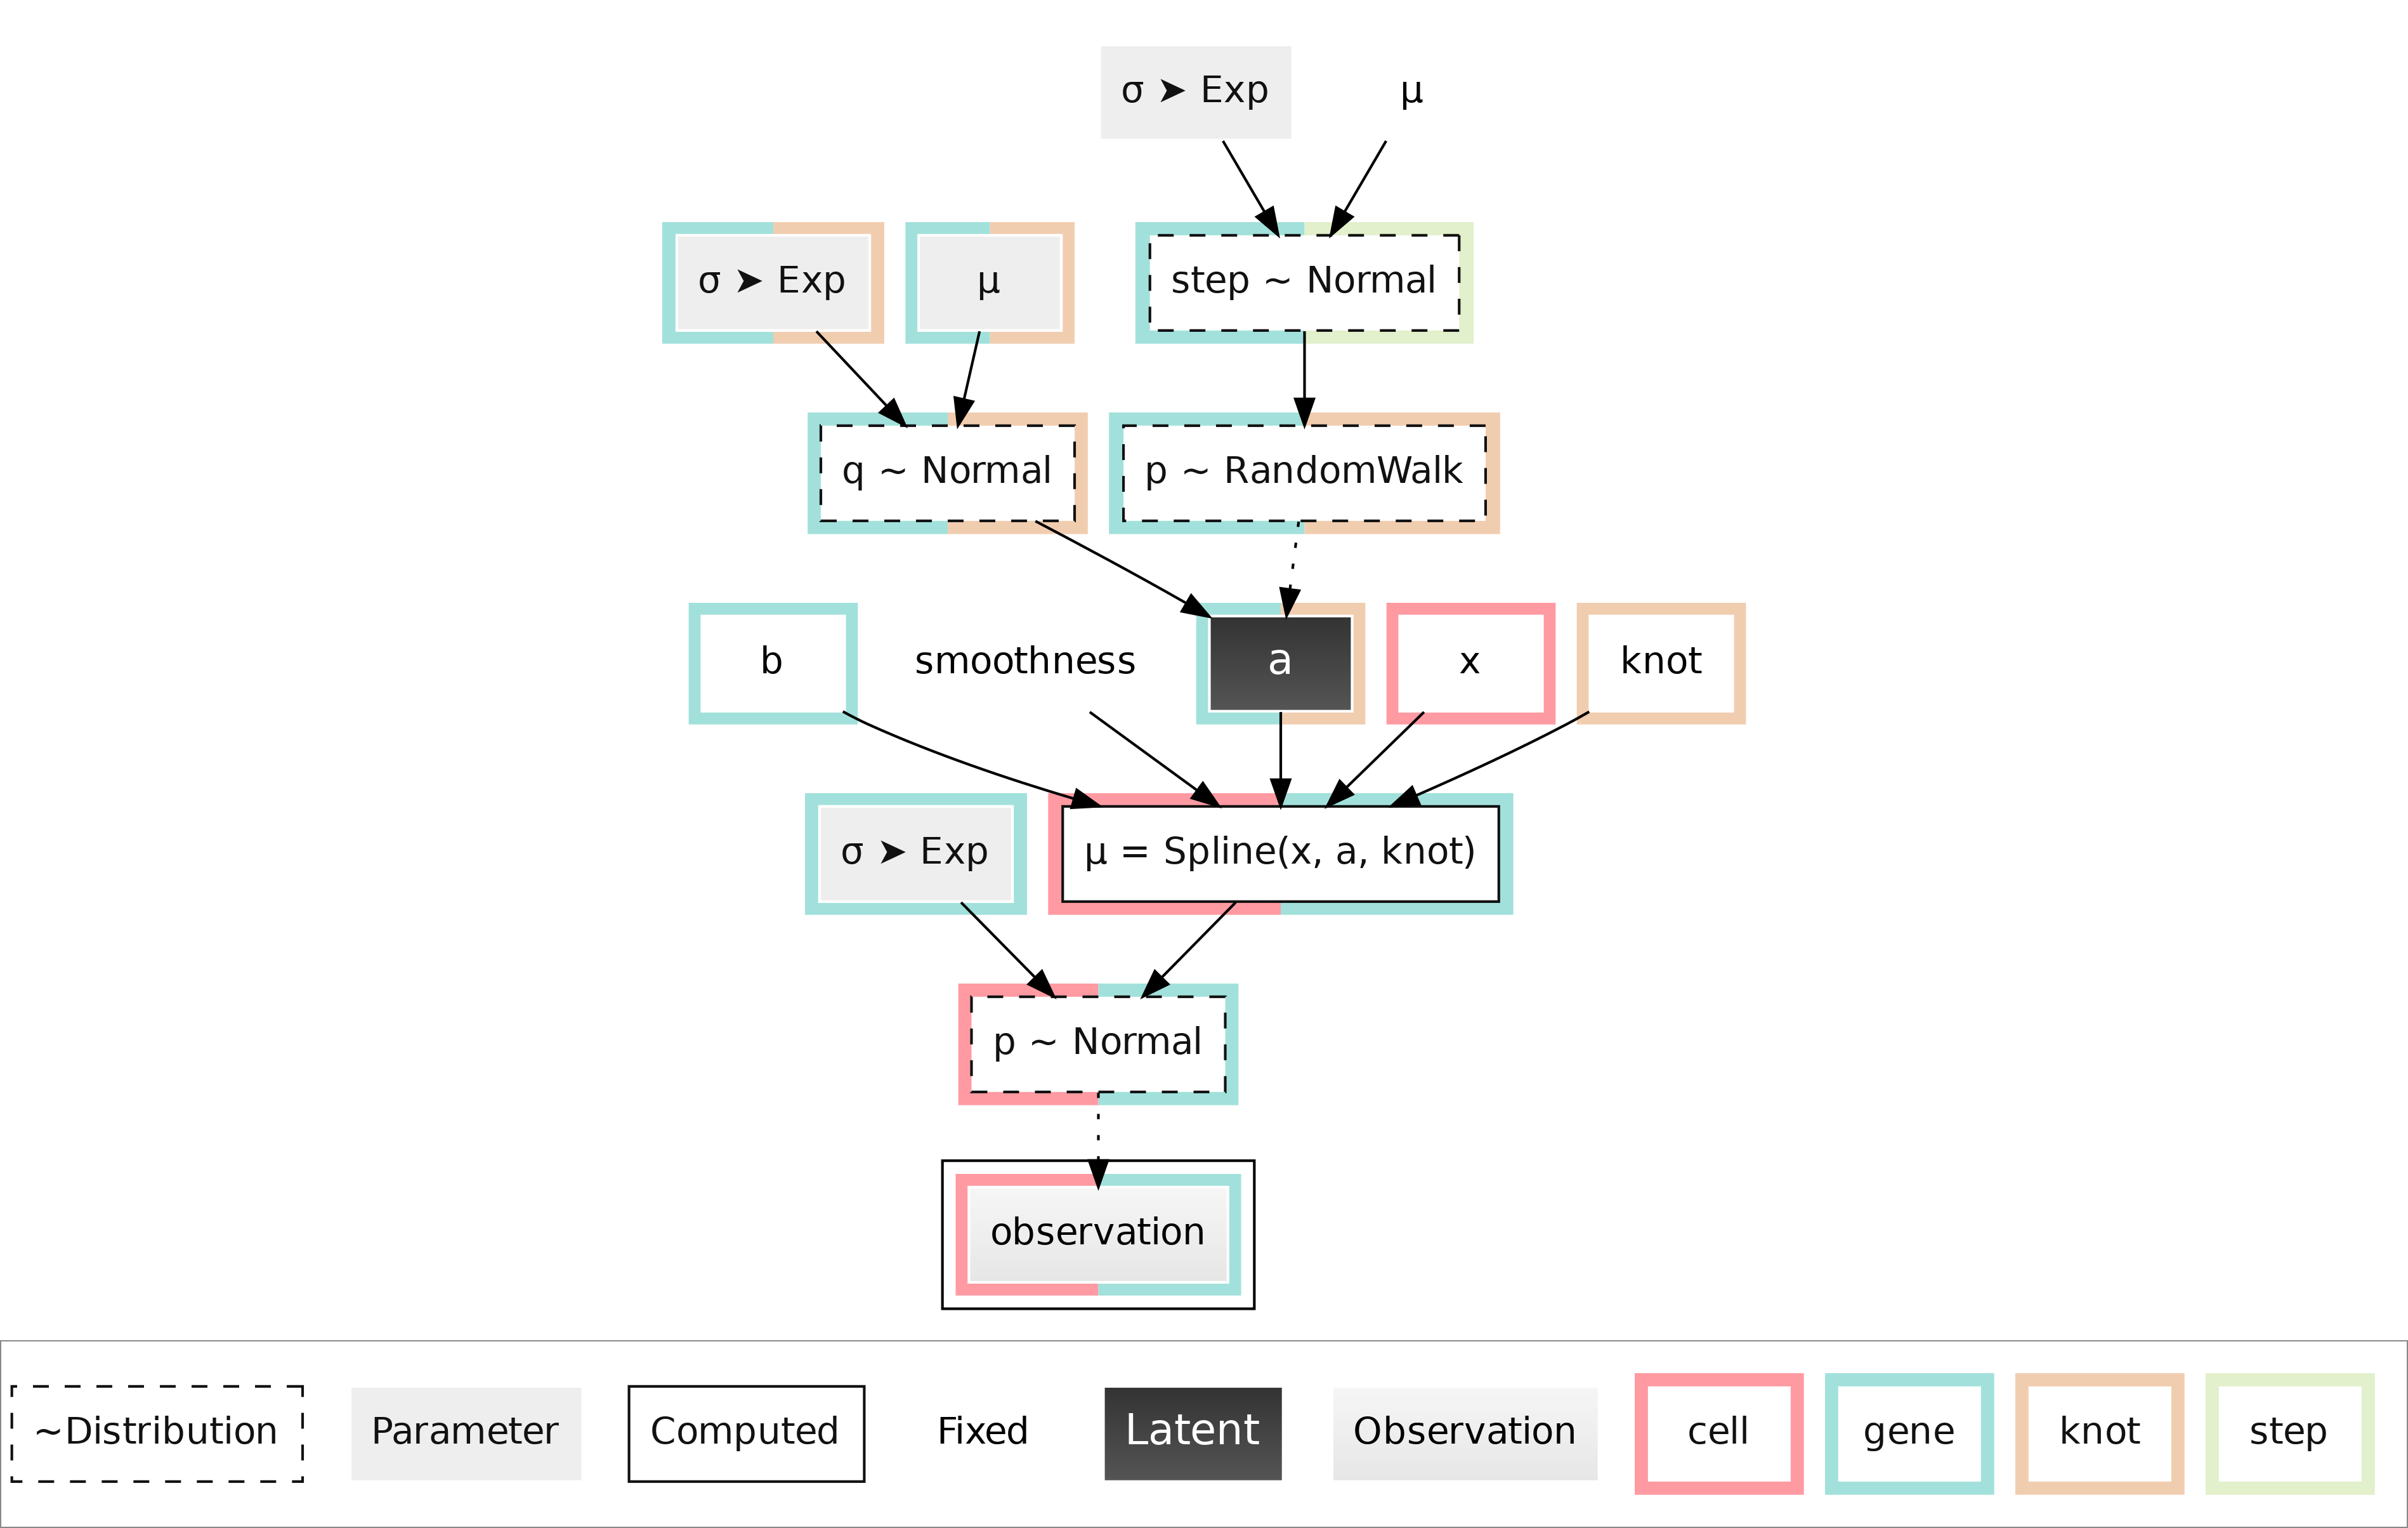

In [23]:
model = la.Model(observation)
model.plot()

  0%|                                                                                                         …

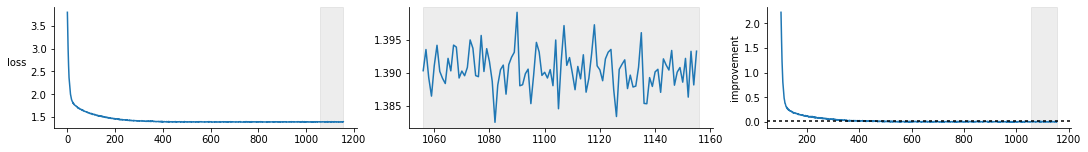

In [24]:
inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot();
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [27]:
observed = la.posterior.Posterior(observation)
observed.sample(10, subsample_n = 1)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

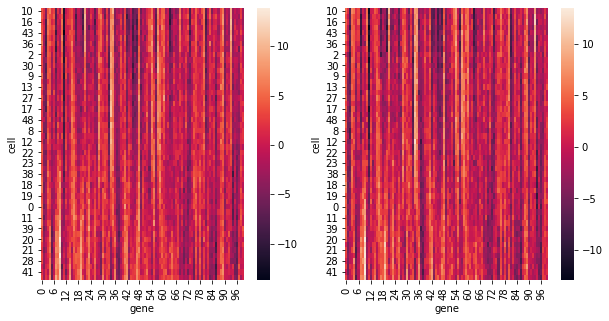

In [28]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)
modelled_value = observed.samples[observation.p].sel(sample = 0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax = ax1)

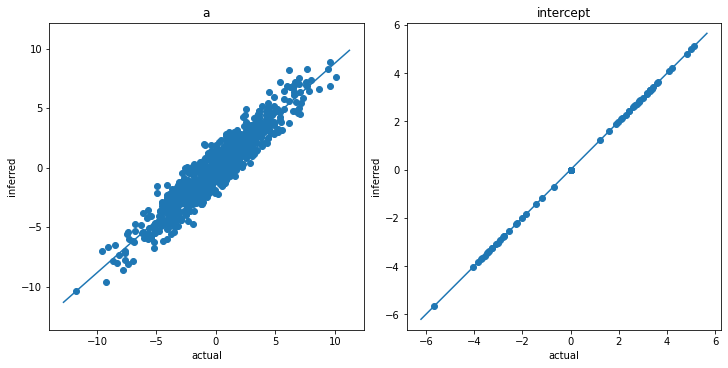

In [29]:
parameter_values = la.qa.cookbooks.check_parameters(la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed))

In [30]:
dim = la.Dim([1, 2, 3, 4], "h")

In [31]:
x_value = pd.Series(
    [1., 2., 3., 0.],
    index = dim.index,
    name = "x"
)
x = la.Fixed(x_value)

y = la.links.scalar.Spline(x)

assert y.value_definition[0] == x[0]
assert y.ndim == 1